In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df = df.drop(['Serial No.'], axis=1)
import matplotlib.pyplot as plt
import seaborn as sns

**1. Correlating different columns (mutual relationships)**

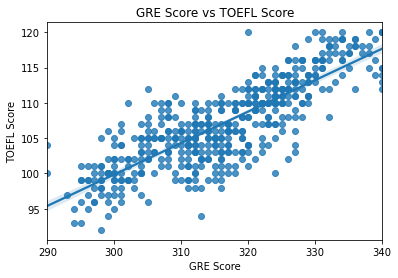

In [4]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

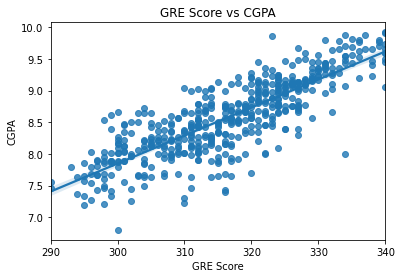

In [5]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

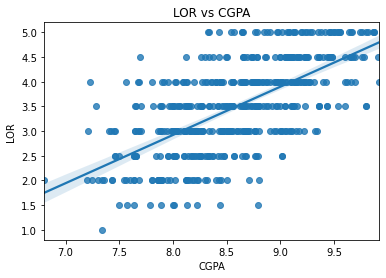

In [6]:
fig = sns.regplot(y="LOR ", x="CGPA", data=df)
plt.title("LOR vs CGPA")
plt.show()

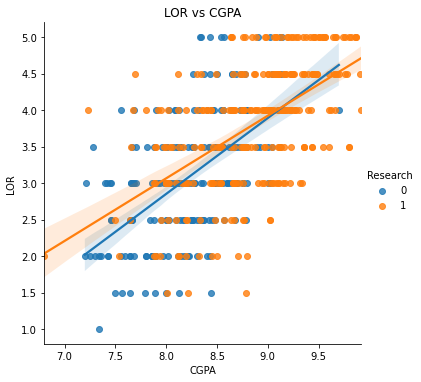

In [7]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("LOR vs CGPA")
plt.show()

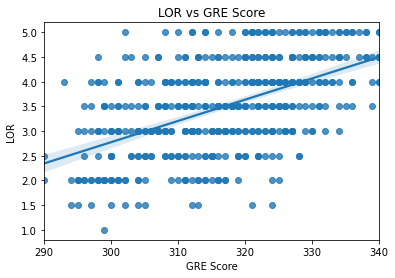

In [8]:
fig = sns.regplot(y="LOR ", x="GRE Score", data=df)
plt.title("LOR vs GRE Score")
plt.show()

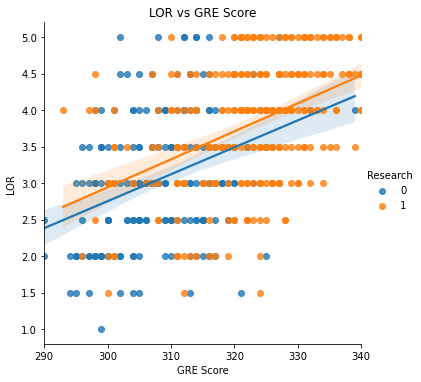

In [9]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("LOR vs GRE Score")
plt.show()

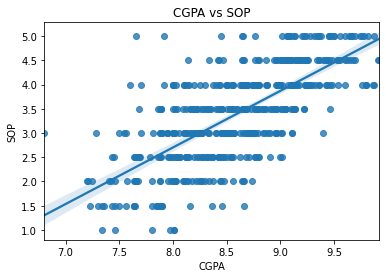

In [10]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("CGPA vs SOP")
plt.show()

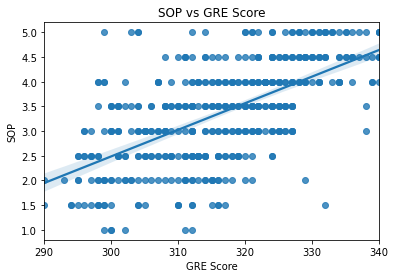

In [11]:
fig = sns.regplot(x="GRE Score", y="SOP", data=df)
plt.title("SOP vs GRE Score")
plt.show()

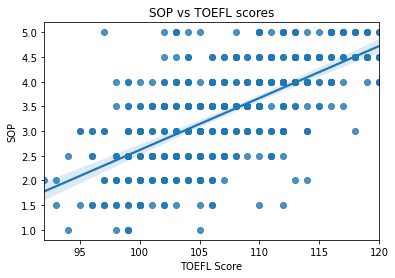

In [12]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("SOP vs TOEFL scores")
plt.show()

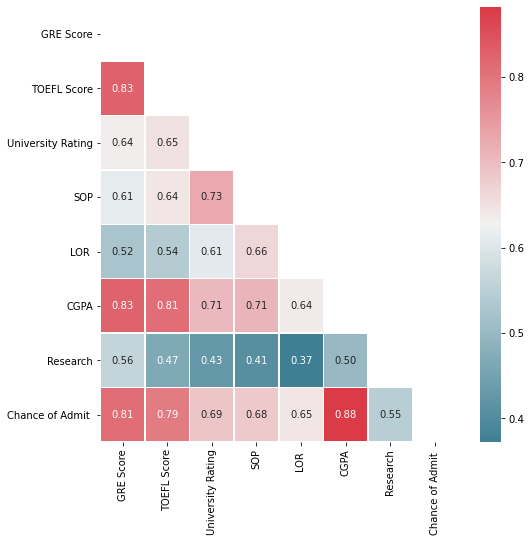

In [13]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()